# 1. Import Lib

### import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import skew
import pickle
import json
from sklearn.datasets import load_boston

# 2. Problem Statement

In [ ]:
To predict the price by using various independent variables:-
    
Dependent Variables:  'Price'
Independent variables : 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                        'RM', 'AGE', 'DIS', 'RAD',
                        'TAX', 'PTRATIO', 'B', 'LSTAT'

# 3. Data Gathering

In [3]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
boston_df.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [7]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# 4. Exploratory Data Analysis (EDA):-

In [8]:
# CRIM

In [9]:
boston_df["CRIM"]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

<AxesSubplot:xlabel='CRIM'>

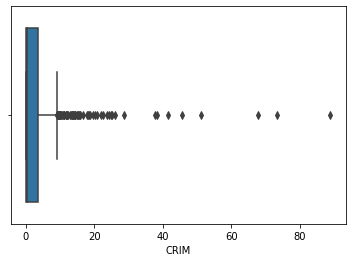

In [10]:
sns.boxplot(x = boston_df['CRIM'])

In [11]:
# To detect Extreme Outliers

q1 = boston_df['CRIM'].quantile(0.25)
q2 = boston_df['CRIM'].quantile(0.50)
q3 = boston_df['CRIM'].quantile(0.75)
median = boston_df['CRIM'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.08204499999999999
Q2 : 0.25651
Q3 : 3.6770825
median : 0.25651
Upper Tail : 14.462195000000001
Lower Tail : -10.7030675


In [12]:
boston_df['CRIM'].median()

0.25651

In [13]:
median_CRIM = boston_df.loc[(boston_df['CRIM'] <= upper_tail) & 
                            (boston_df['CRIM'] >= lower_tail),'CRIM'].median()
    
median_CRIM

0.21848

In [14]:
boston_df.loc[(boston_df['CRIM'] > upper_tail) |
                            (boston_df['CRIM'] < lower_tail),'CRIM'] = median_CRIM

In [15]:
boston_df.loc[(boston_df['CRIM'] > upper_tail) |
                            (boston_df['CRIM'] < lower_tail),'CRIM']

Series([], Name: CRIM, dtype: float64)

<AxesSubplot:xlabel='CRIM'>

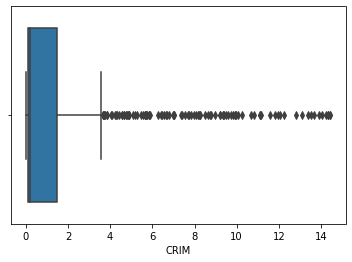

In [16]:
sns.boxplot(x = boston_df['CRIM'])

In [17]:
# ZN

In [18]:
boston_df["ZN"]

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64

<AxesSubplot:xlabel='ZN'>

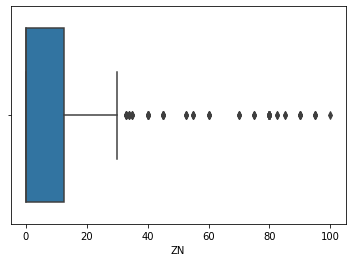

In [19]:
sns.boxplot(x = boston_df['ZN'])

In [20]:
# INDUS

In [21]:
boston_df["INDUS"]

0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64

<AxesSubplot:xlabel='INDUS'>

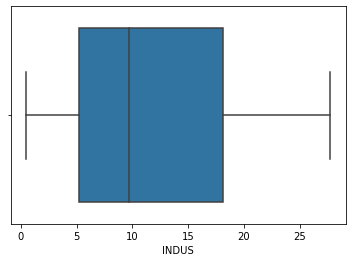

In [22]:
sns.boxplot(x = boston_df['INDUS'])

In [23]:
# CHAS

In [24]:
boston_df["CHAS"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [25]:
# NOX

In [26]:
boston_df["NOX"]

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

<AxesSubplot:xlabel='NOX'>

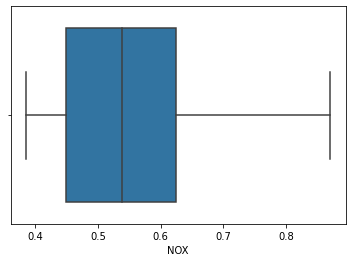

In [27]:
sns.boxplot(x = boston_df['NOX'])

In [28]:
# RM

In [29]:
boston_df["RM"]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

<AxesSubplot:xlabel='RM'>

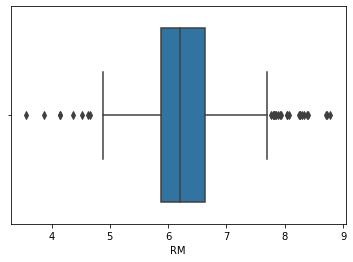

In [30]:
sns.boxplot(x = boston_df['RM'])

In [31]:
# To detect Extreme Outliers

q1 = boston_df['RM'].quantile(0.25)
q2 = boston_df['RM'].quantile(0.50)
q3 = boston_df['RM'].quantile(0.75)
median = boston_df['RM'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 5.8854999999999995
Q2 : 6.2085
Q3 : 6.6235
median : 6.2085
Upper Tail : 8.837500000000002
Lower Tail : 3.671499999999998


In [32]:
median_RM = boston_df.loc[(boston_df['RM'] <= upper_tail) & 
                            (boston_df['RM'] >= lower_tail),'RM'].median()
    
median_RM

6.209

In [33]:
boston_df.loc[(boston_df['RM'] > upper_tail) |
                            (boston_df['RM'] < lower_tail),'RM'] = median_RM

In [34]:
boston_df.loc[(boston_df['RM'] > upper_tail) |
                            (boston_df['RM'] < lower_tail),'RM']

Series([], Name: RM, dtype: float64)

<AxesSubplot:xlabel='RM'>

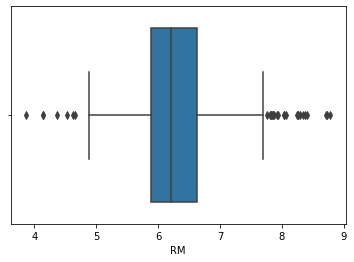

In [35]:
sns.boxplot(x = boston_df['RM'])

In [36]:
# AGE

In [37]:
boston_df["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

<AxesSubplot:xlabel='AGE'>

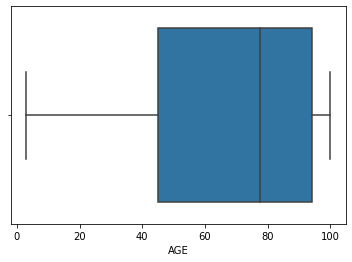

In [38]:
sns.boxplot(x = boston_df['AGE'])

In [39]:
# DIS

In [40]:
boston_df["DIS"]

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

<AxesSubplot:xlabel='DIS'>

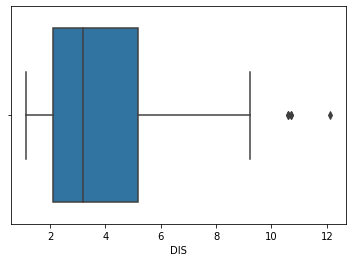

In [41]:
sns.boxplot(x = boston_df['DIS'])

In [42]:
# To detect Extreme Outliers

q1 = boston_df['DIS'].quantile(0.25)
q2 = boston_df['DIS'].quantile(0.50)
q3 = boston_df['DIS'].quantile(0.75)
median = boston_df['DIS'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 2.100175
Q2 : 3.2074499999999997
Q3 : 5.1884250000000005
median : 3.2074499999999997
Upper Tail : 14.453175000000002
Lower Tail : -7.164575000000001


In [43]:
median_DIS = boston_df.loc[(boston_df['DIS'] <= upper_tail) & 
                            (boston_df['DIS'] >= lower_tail),'DIS'].median()
    
median_DIS

3.2074499999999997

In [44]:
boston_df.loc[(boston_df['DIS'] > upper_tail) |
                            (boston_df['DIS'] < lower_tail),'DIS'] = median_DIS

In [45]:
boston_df.loc[(boston_df['DIS'] > upper_tail) |
                            (boston_df['DIS'] < lower_tail),'DIS'] 

Series([], Name: DIS, dtype: float64)

<AxesSubplot:xlabel='DIS'>

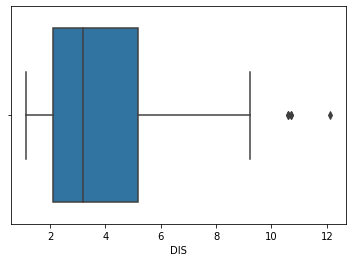

In [46]:
sns.boxplot(x = boston_df['DIS'])

In [47]:
# RAD

In [48]:
boston_df["RAD"]

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: RAD, Length: 506, dtype: float64

<AxesSubplot:xlabel='RAD'>

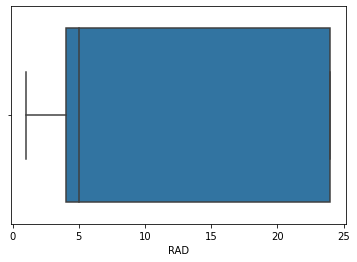

In [49]:
sns.boxplot(x = boston_df['RAD'])

In [50]:
# TAX

In [51]:
boston_df["TAX"]

0      296.0
1      242.0
2      242.0
3      222.0
4      222.0
       ...  
501    273.0
502    273.0
503    273.0
504    273.0
505    273.0
Name: TAX, Length: 506, dtype: float64

<AxesSubplot:xlabel='TAX'>

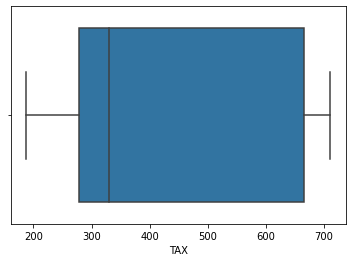

In [52]:
sns.boxplot(x = boston_df['TAX'])

In [53]:
# PTRATIO

In [54]:
boston_df["PTRATIO"]

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64

<AxesSubplot:xlabel='PTRATIO'>

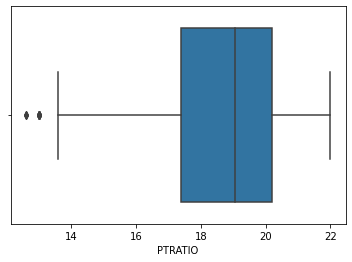

In [55]:
sns.boxplot(x = boston_df['PTRATIO'])

In [56]:
# To detect Extreme Outliers

q1 = boston_df['PTRATIO'].quantile(0.25)
q2 = boston_df['PTRATIO'].quantile(0.50)
q3 = boston_df['PTRATIO'].quantile(0.75)
median = boston_df['PTRATIO'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 17.4
Q2 : 19.05
Q3 : 20.2
median : 19.05
Upper Tail : 28.6
Lower Tail : 8.999999999999996


In [57]:
median_PTRATIO = boston_df.loc[(boston_df['PTRATIO'] <= upper_tail) & 
                            (boston_df['PTRATIO'] >= lower_tail),'PTRATIO'].median()
    
median_PTRATIO

19.05

In [58]:
boston_df.loc[(boston_df['PTRATIO'] > upper_tail) |
                            (boston_df['PTRATIO'] < lower_tail),'PTRATIO'] = median_PTRATIO

In [59]:
boston_df.loc[(boston_df['PTRATIO'] > upper_tail) |
                            (boston_df['PTRATIO'] < lower_tail),'PTRATIO']

Series([], Name: PTRATIO, dtype: float64)

<AxesSubplot:xlabel='PTRATIO'>

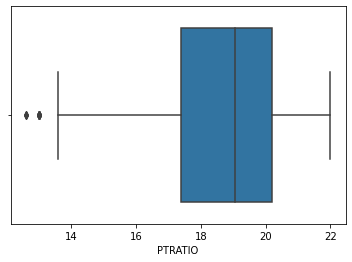

In [60]:
sns.boxplot(x = boston_df['PTRATIO'])

In [61]:
# B

In [62]:
boston_df["B"]

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

<AxesSubplot:xlabel='B'>

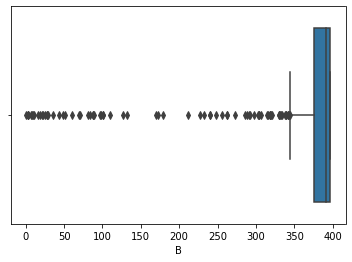

In [63]:
sns.boxplot(x = boston_df['B'])

In [64]:
# To detect Extreme Outliers

q1 = boston_df['B'].quantile(0.25)
q2 = boston_df['B'].quantile(0.50)
q3 = boston_df['B'].quantile(0.75)
median = boston_df['B'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 375.3775
Q2 : 391.44
Q3 : 396.225
median : 391.44
Upper Tail : 458.7675000000001
Lower Tail : 312.8349999999999


In [65]:
median_B = boston_df.loc[(boston_df['B'] <= upper_tail) & 
                            (boston_df['B'] >= lower_tail),'B'].median()
    
median_B

392.84000000000003

In [66]:
boston_df.loc[(boston_df['B'] > upper_tail) |
                            (boston_df['B'] < lower_tail),'B'] = median_B

In [67]:
boston_df.loc[(boston_df['B'] > upper_tail) |
                            (boston_df['B'] < lower_tail),'B'] 

Series([], Name: B, dtype: float64)

<AxesSubplot:xlabel='B'>

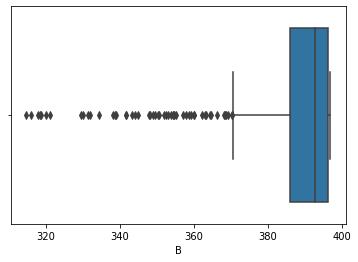

In [68]:
sns.boxplot(x = boston_df['B'])

In [69]:
# LSTAT

In [70]:
boston_df["LSTAT"]

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

<AxesSubplot:xlabel='LSTAT'>

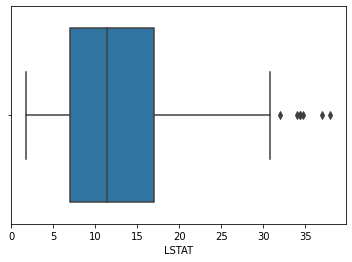

In [71]:
sns.boxplot(x = boston_df['LSTAT'])

In [72]:
# To detect Extreme Outliers

q1 = boston_df['LSTAT'].quantile(0.25)
q2 = boston_df['LSTAT'].quantile(0.50)
q3 = boston_df['LSTAT'].quantile(0.75)
median = boston_df['LSTAT'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 6.949999999999999
Q2 : 11.36
Q3 : 16.955000000000002
median : 11.36
Upper Tail : 46.97000000000001
Lower Tail : -23.06500000000001


In [73]:
median_LSTAT = boston_df.loc[(boston_df['LSTAT'] <= upper_tail) & 
                            (boston_df['LSTAT'] >= lower_tail),'LSTAT'].median()
    
median_LSTAT

11.36

In [74]:
boston_df.loc[(boston_df['LSTAT'] > upper_tail) |
                            (boston_df['LSTAT'] < lower_tail),'LSTAT'] = median_LSTAT

In [75]:
boston_df.loc[(boston_df['LSTAT'] > upper_tail) |
                            (boston_df['LSTAT'] < lower_tail),'LSTAT'] 

Series([], Name: LSTAT, dtype: float64)

<AxesSubplot:xlabel='LSTAT'>

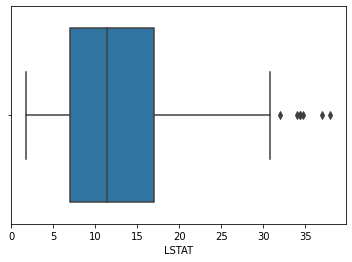

In [76]:
sns.boxplot(x = boston_df['LSTAT'])

In [77]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 5. Feature Selection

In [78]:
boston_df = boston_df.select_dtypes(exclude=object)
x = boston_df.drop('PRICE',axis = 1)
y = boston_df['PRICE']

In [79]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [80]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [81]:
# 6. model training

In [82]:
# Train Test Split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,0.21848,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,392.84,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_train

42     25.3
58     23.3
385     7.2
78     21.2
424    11.7
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: PRICE, Length: 404, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,392.84,15.69


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_test

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
92     22.9
224    44.8
110    21.7
426    10.2
443    15.4
Name: PRICE, Length: 102, dtype: float64

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [88]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [89]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

# 6.Model Evaluation

## Matrice evaluation

In [90]:
## train evaluation

y_pred = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred)
print("R Squared Value :",r_squared_value)

r2 = linear_reg_model.score(x_train, y_train) # Without Predict Function
print("R2 :",r2)

adj_r2 = 1 - (((1-r_squared_value) * (x_train.shape[0] - 1))/(x_train.shape[0]- x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Squared Error : 22.334466195159
Root Mean Squared Error : 4.725935483600998
Mean Absolute Error : 3.2665128570085185
R Squared Value : 0.7235196423143107
R2 : 0.7235196423143107
Adjusted R-Squared Value : 0.7143036303914543


In [91]:
## test evaluation

y_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 = linear_reg_model.score(x_test, y_test) # Without Predict Function
print("R2 :",r2)

adj_r2 = 1 - (((1-r_squared_value) * (x_test.shape[0] - 1))/(x_test.shape[0]- x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Squared Error : 23.96652724967501
Root Mean Squared Error : 4.8955619952846074
Mean Absolute Error : 3.832657812946995
R Squared Value : 0.7574910419138441
R2 : 0.7574910419138441
Adjusted R-Squared Value : 0.7216658549238437


# 7.Testing on Single Row

In [92]:
x.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [93]:
# Indepned varibale(Fratures):-

CRIM= 0.00687
ZN=19.0
INDUS=3.21
CHAS=0.0
NOX=0.469
RM=7.185
AGE=69
DIS=6.06
RAD=3.0
TAX=273.0
PTRATIO=18.7
B=396.90
LSTAT=5.64

# Depended varibale (features)= PRICE ==?

In [94]:
column_names = x.columns
column_names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [95]:
project_data = {'columns' : list(x.columns)}

In [96]:
test_array = np.zeros(x.shape[1])
test_array[0] = CRIM
test_array[1] = ZN
test_array[2] = INDUS
test_array[3] = CHAS
test_array[4] = NOX
test_array[5] = RM
test_array[6] = AGE
test_array[7] = DIS
test_array[8] = RAD
test_array[9] = TAX
test_array[10] = PTRATIO
test_array[11] = B
test_array[12] = LSTAT


test_array

array([6.870e-03, 1.900e+01, 3.210e+00, 0.000e+00, 4.690e-01, 7.185e+00,
       6.900e+01, 6.060e+00, 3.000e+00, 2.730e+02, 1.870e+01, 3.969e+02,
       5.640e+00])

In [97]:
model.predict([test_array])

F:\ANACONDA\envs\env_abhi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.9228956])

In [98]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [99]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)